
Copyright 2020 Abhishek Dabas

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Classification Problem
### Absract 
We have a customer churn dataset, which can help us understand which type of features affect the customer to cancel the telecom subscription of a ```Telecom Company```. We will go through the process of cleaning the data, some visualization, Feature selection, and then try to create a predictive model. We will try to answer a few questions through out the notebook.

- The Churn dataset used here is a classification dataset, where we try to predict whether or not a customer is going to churn or not. So prediction here is ``Yes`` or ``No``. In classification problems we try to predict the observations probabililty of being in a specific category.
- Data Visualizations for understanding the spread of the data
- we will try to Find correlations in the data
- Significance of variables in the data
- We will use 3 models for predicitions: Logistic Regression, SVM & Random forest classifier
- We will be Tuning the models for selecting the best hyperparameters
- Selecting the best Model based on the results

> Lets go through the notebook and try to understand every step\
> Conclusion and the Resources used for citing will be at the end of the notebook!!

### Importing the libraries

In [1]:
# pip install -U scikit-learn

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.svm import SVC 
from sklearn import metrics

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

## Public dataset from Kaggle
Link: https://www.kaggle.com/blastchar/telco-customer-churn/notebooks

In [66]:
# Loading and Reading the data
df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Examine the Data
### Nulls & data types 

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [70]:
# Changi the dtype
# "TotalCharges" column from object -> Float dtype

df["TotalCharges"] = pd.to_numeric(df.TotalCharges,errors="coerce")  ## coerce converts bad values to NaN

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Nan Values should be removed for better predictions

In [7]:
# filling in nan values with mean

df["TotalCharges"].fillna(df.TotalCharges.mean(), inplace= True)

# checking the values after replacing the nan values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

### Descriptive statistics
We will try to describe the dataset in terms of their mean, median, standard deviation

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
# creating a copy of original data

# cdf = df.copy()
# cdf

# Data Cleaning

In [11]:
# dropping the customerID column(feature)

df.drop(["customerID"],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Categorical Data

In [12]:
# Convert gender to Numberic column
gender = {'Male': 1,'Female': 0} 
df.gender = [gender[item] for item in df.gender] 

In [13]:
## Yes/No columns
listofcolumns = ["Partner","Dependents","PhoneService","PaperlessBilling","Churn"]
for i in listofcolumns:
    df[i].replace({"No":0, "Yes":1},inplace=True)
    # changin the datatype
    df[i] = pd.to_numeric(df[i],errors="coerce")

In [14]:
# yes/no/no internet columns
listofcolumnns2 = [ "OnlineSecurity" , "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
values = {"Yes": 1,"No" : 0 ,"No internet service" : 2 }
for i in listofcolumnns2:
  df[i] = [values[i] for i in df[i]]
  

#### Label encoding

In [15]:
le =LabelEncoder()
df["InternetService"] = le.fit_transform(df["InternetService"])
# df["Internet_Services"].unique() ##checking the unique values
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


### Dummy variables

In [16]:
# Using get.dummies from pandas
df = pd.get_dummies(df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [17]:
# dropping the "_No" columns as they are not required when we have "_Yes" columns
# Also we need to remove these columns because otherwise the columns will be correlated with each other 

# dropcolumns=["gender_Female", "Partner_No","  Dependents_No"]
# dropcolumns = ["MultipleLines_No","OnlineSecurity_No","OnlineBackup_No","DeviceProtection_No","TechSupport_No","StreamingTV_No","StreamingMovies_No"]
dropcolumns = ["MultipleLines_No"]
for i in dropcolumns:
  df.drop(i,axis=1,inplace=True)

### Converting the categorical Variables 
Most Machine Learning Algorithms cannot work with categorical variables directly, they need to be converted to numbers.

## Visualization

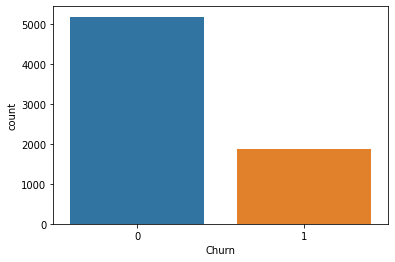

In [19]:
## Churn Vizualisation

#countplot
sns.countplot(x="Churn",data=df)

C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\plo

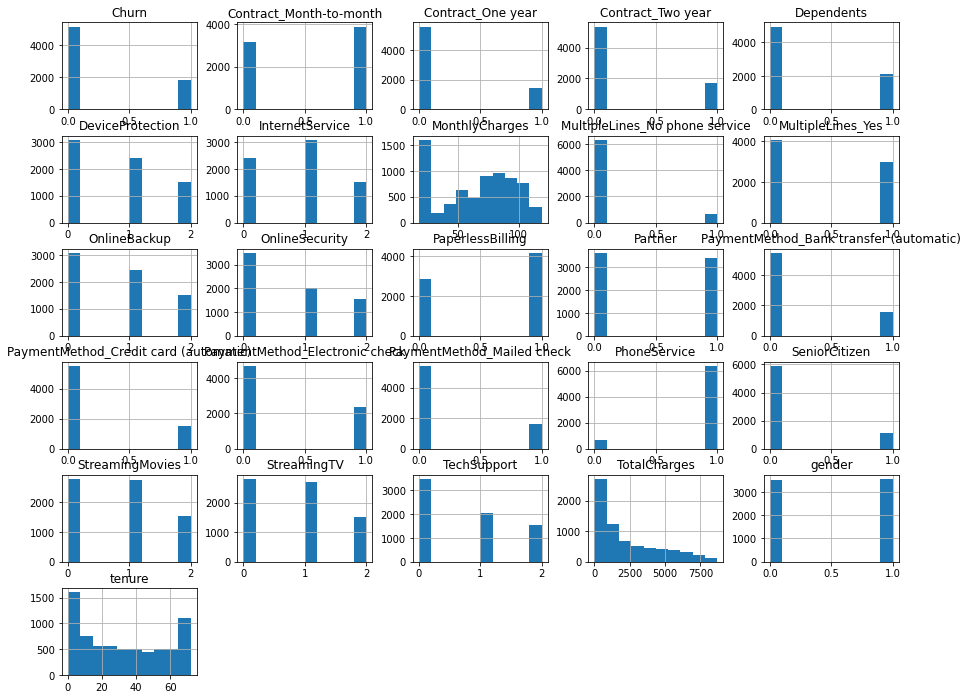

In [20]:
# distribution of the data

df.hist(figsize = (15,12))
plt.show()

### Boxplots

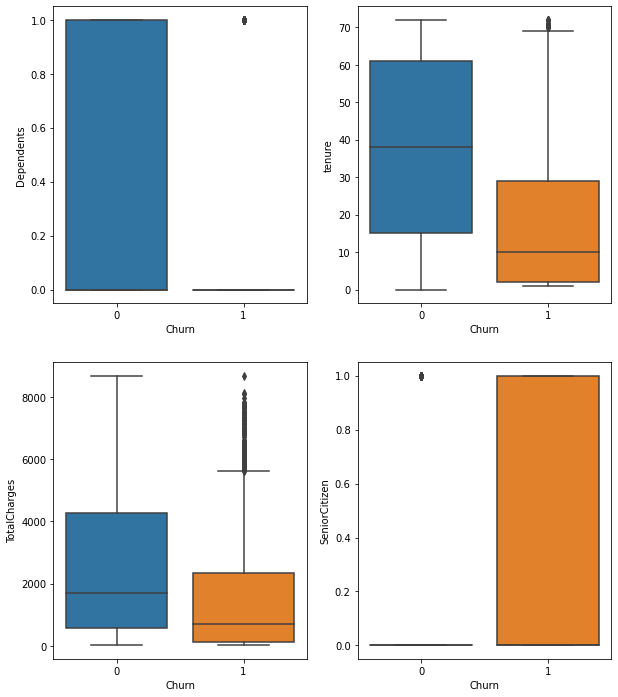

In [21]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))
ax = [ax1, ax2, ax3, ax4]

boxplot_columns = ["Dependents","tenure", "TotalCharges","SeniorCitizen"]
for i in range(len(boxplot_columns)):
    sns.boxplot(x="Churn",y=boxplot_columns[i], data= df, ax=ax[i])

> We can see that the customer churn is associated with ``lower Tenure`` & ``Total Charges``.
> 

[]

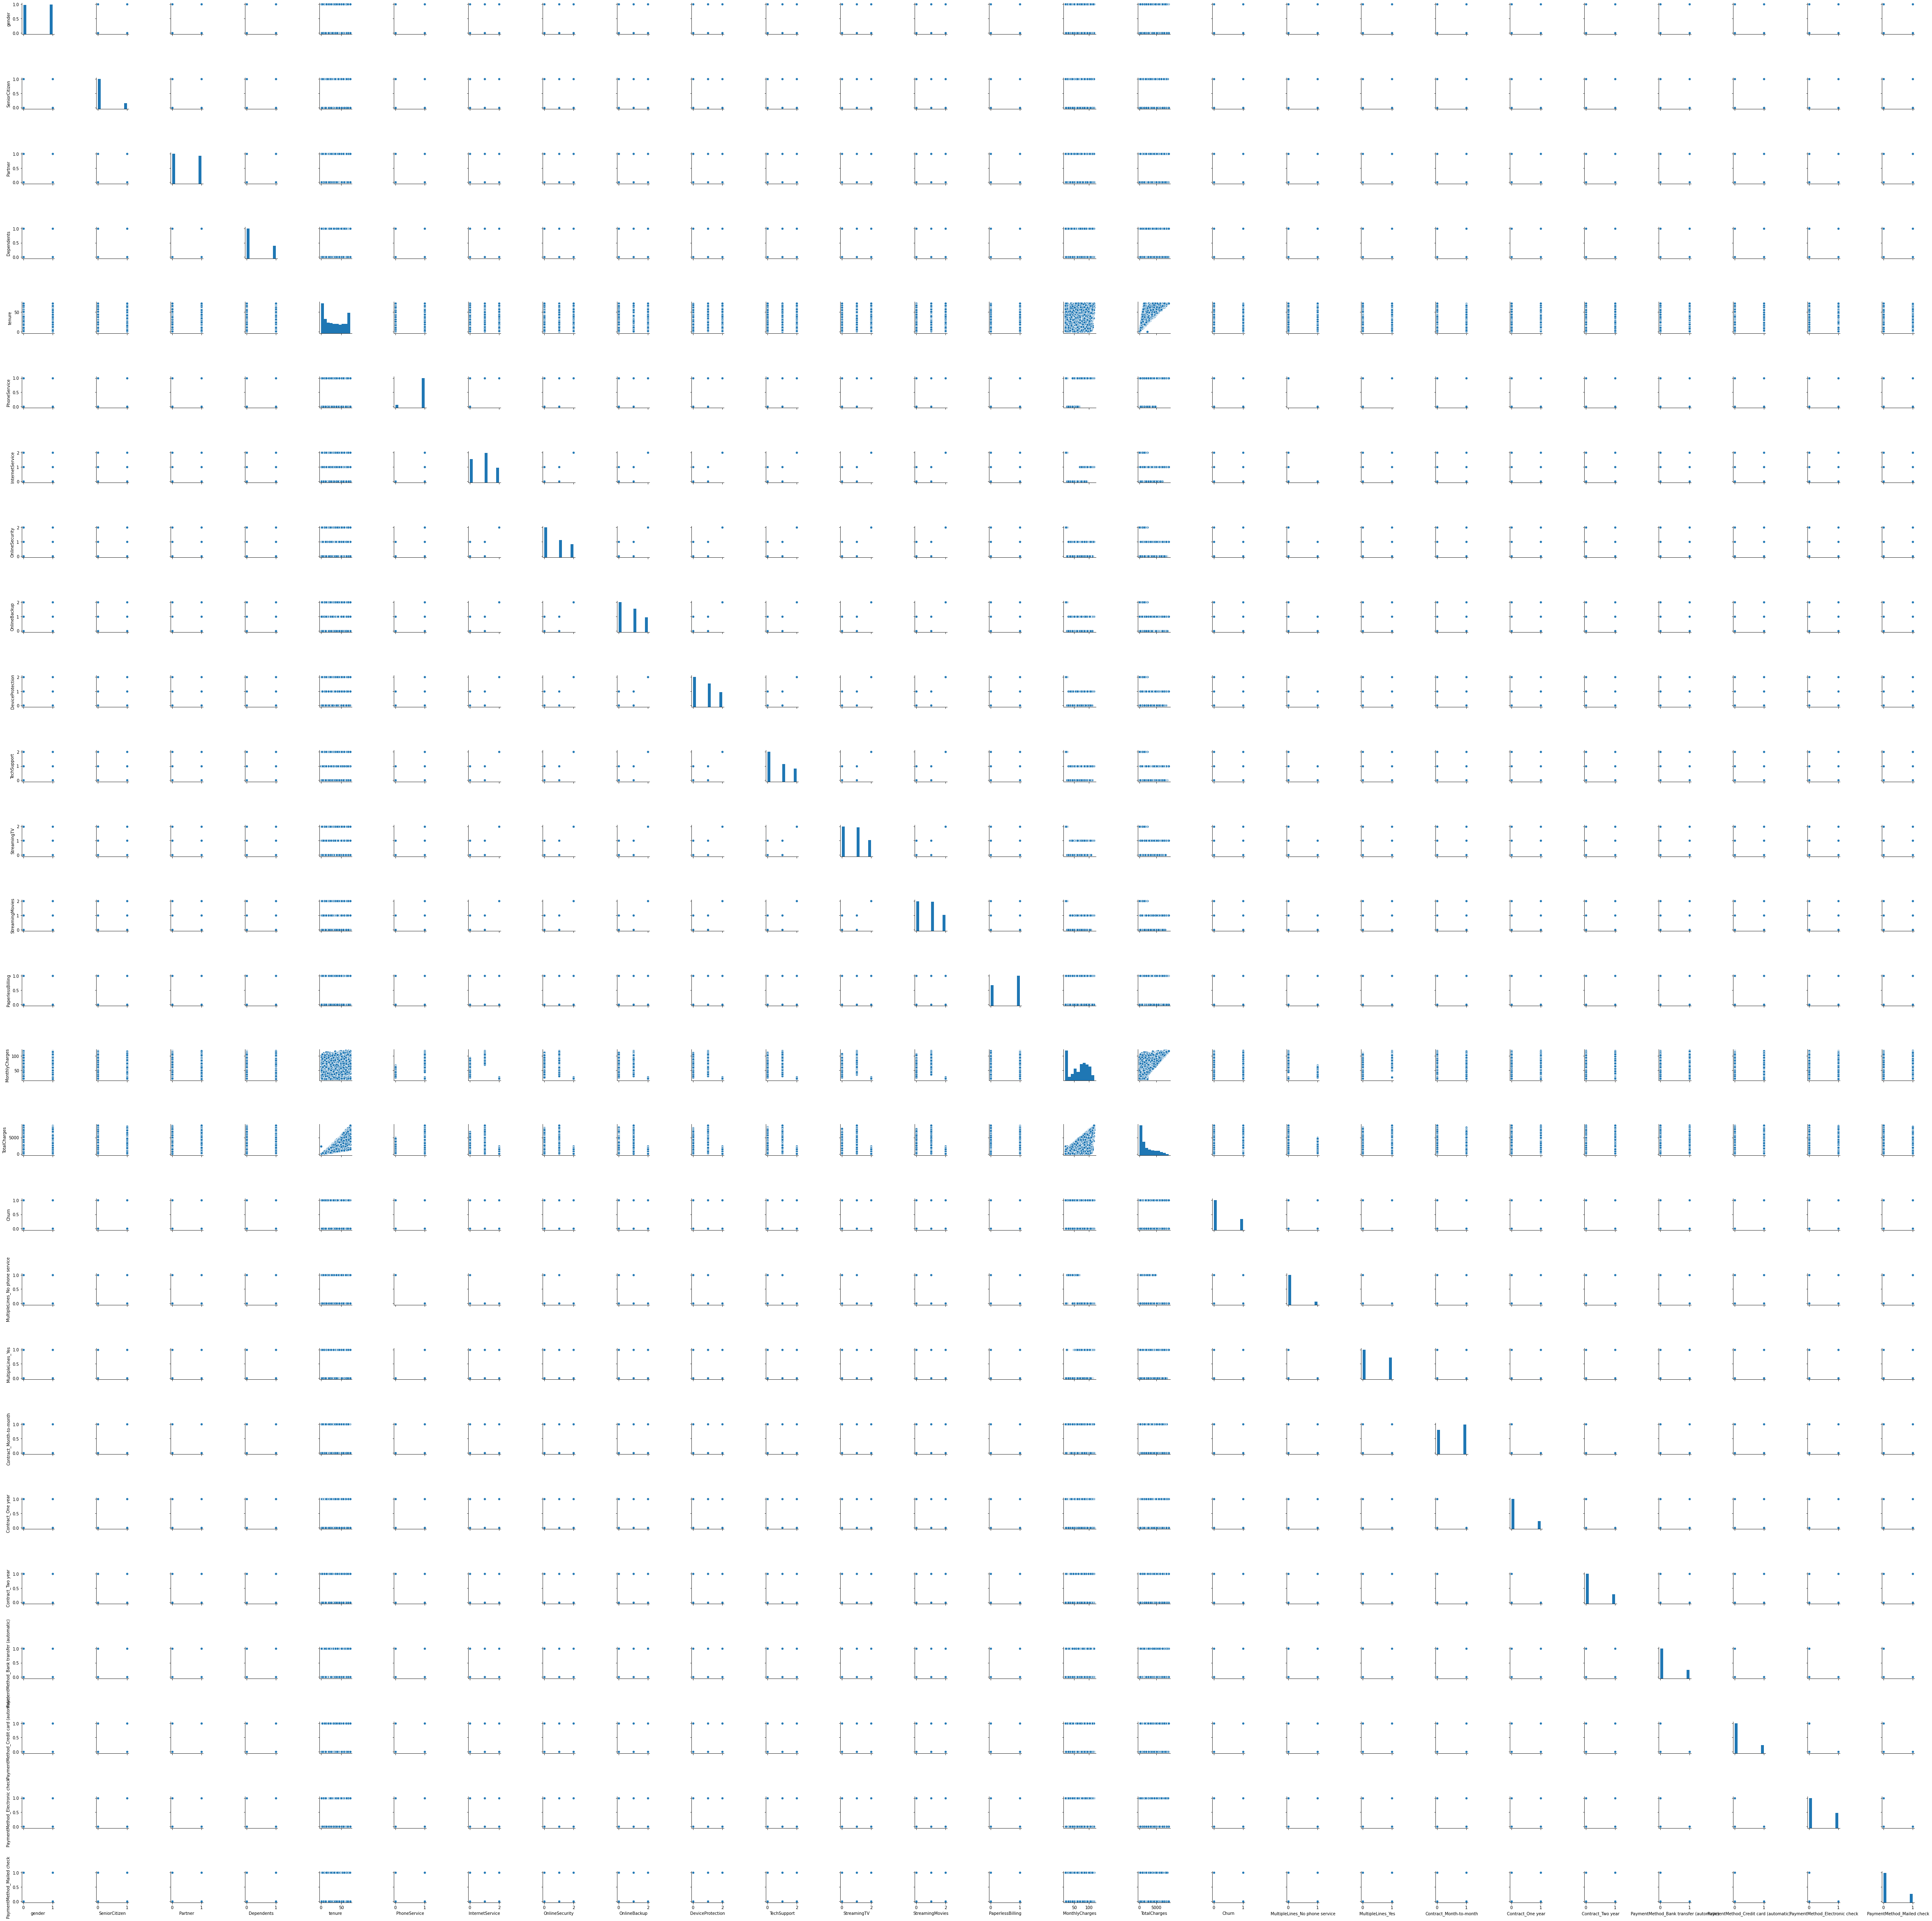

In [22]:
# # # Pairwise relationship

sns.pairplot(df)
plt.plot()

# Check for correlation
Multicollinearity occurs when two or more independent variables (a.k.a. features) in the dataset are correlated with each other.
## Multicollinearity 
It ooccurs when the independent variables are too highly correlated with each other. You can use a correlation matrix to check if the variables are correlated to each other. You can remove one set of the columns which are correlated while keeping the other.

# Correlation

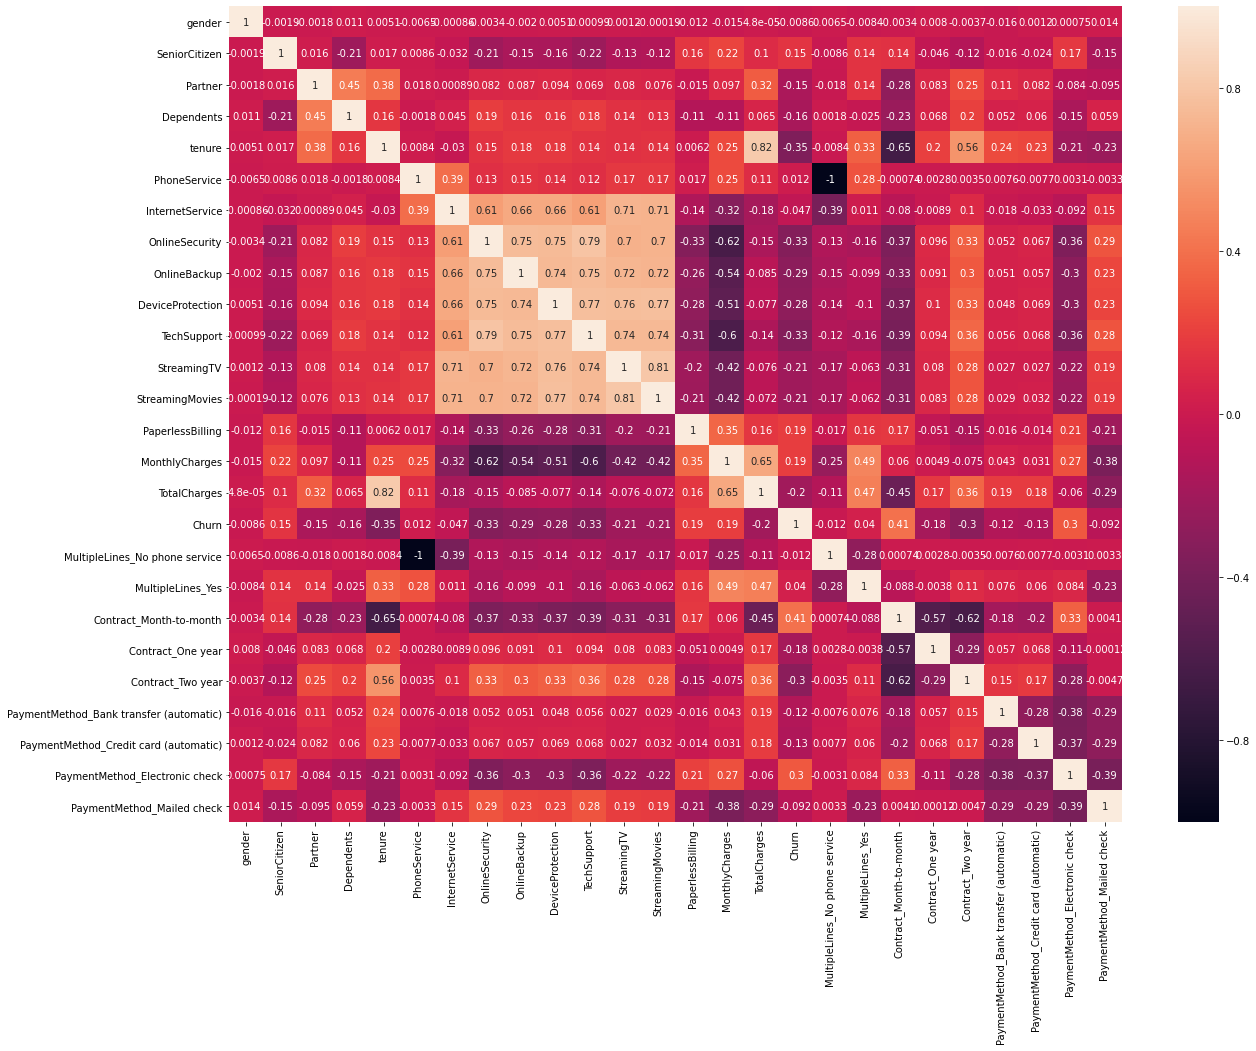

In [23]:
f, ax = plt.subplots(figsize=(20, 15))
corrmatrix = df.corr()
sns.heatmap(corrmatrix,annot=True, xticklabels=corrmatrix.columns.values,
            yticklabels=corrmatrix.columns.values)
plt.show()

>> We can see "MultipleLines_No_Phone Service is negatively correlated to the "Phone Service" as the when the value is "0" in PhoneService column
 then there is a value of "1" in the column "no phone service"

# Splitting the Dataset
Churn will be the ``dependent vairable`` and all other columns are the ``independent variables``

In [24]:
# Data
y = df["Churn"]
X = df.drop(["Churn"],axis=1)

## Feature Selection

In [25]:
sm_model = sm.Logit(y,X).fit()
sm_model.summary()

# X = sm.add_constant(X) 

Optimization terminated successfully.
         Current function value: 0.414054
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7020
Method:                           MLE   Df Model:                           22
Date:                Thu, 01 Oct 2020   Pseudo R-squ.:                  0.2844
Time:                        10:42:27   Log-Likelihood:                -2916.2
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
gender                                     -0.0239      0.065     -0.370      0.712      -0.151       0.103
SeniorCitizen                               0.2132      0.085      2.522      0.012       0.048       0.379
Partner                                    -0.0007      0.078     -0.009      0.993      -0.153       0.152
Dependents                                 -0.1558      0.090     -1.738      0.082      -0.332       0.020
tenure                                     -0.0583      0.006     -9.659      0.000      -0.070      -0.046
PhoneService                               -0.8625   1.22e+06  -7.05e-07      1.000    -2.4e+06     2.4e+06
InternetService                             0.5825      0.086      6.744      0.000       0.413       0.752
OnlineSecurity                             -0.4416      0.080     -5.522      0.000      -0.598      -0.285
OnlineBackup                               -0.2089      0.073     -2.847      0.004      -0.353      -0.065
DeviceProtection                           -0.0866      0.077     -1.132      0.257      -0.237       0.063
TechSupport                                -0.4161      0.082     -5.086      0.000      -0.577      -0.256
StreamingTV                                 0.1240      0.079      1.570      0.116      -0.031       0.279
StreamingMovies                             0.1371      0.079      1.744      0.081      -0.017       0.291
PaperlessBilling                            0.3449      0.074      4.635      0.000       0.199       0.491
MonthlyCharges                              0.0065      0.003      2.424      0.015       0.001       0.012
TotalCharges                                0.0003    6.9e-05      4.456      0.000       0.000       0.000
MultipleLines_No phone service             -0.1098   1.22e+06  -8.97e-08      1.000    -2.4e+06     2.4e+06
MultipleLines_Yes                           0.2144      0.081      2.648      0.008       0.056       0.373
Contract_Month-to-month                     0.3638   1.65e+06   2.21e-07      1.000   -3.23e+06    3.23e+06
Contract_One year                          -0.3058   1.65e+06  -1.85e-07      1.000   -3.23e+06    3.23e+06
Contract_Two year                          -1.0303   1.65e+06  -6.25e-07      1.000   -3.23e+06    3.23e+06
PaymentMethod_Bank transfer (automatic)    -0.2840   1.71e+06  -1.66e-07      1.000   -3.35e+06    3.35e+06
PaymentMethod_Credit card (automatic)      -0.3705   1.71e+06  -2.17e-07      1.000   -3.35e+06    3.35e+06
PaymentMethod_Electronic check              0.0224   1.71e+06   1.31e-08      1.000   -3.35e+06    3.35e+06
PaymentMethod_Mailed check                 -0.3403   1.71e+06  -1.99e-07      1.000   -3.35e+06    3.35e+06
===========================================================================================================
"""

In [26]:
# we can use this for regularized fit

# smr_model = sm.Logit(y,X).fit_regularized()
# smr_model.summary()

- ```df(Residual)``` is the sample size minus the number of parameters being estimated, so it becomes df(Residual) = n - (k+1) or df(Residual) = n - k - 1. It's often easier just to use subtraction once you know the total and the regression degrees of freedom.\
``R-Squared vs Adjusted R-Squared``\
- There is a problem with the R2 for multiple regression. Yes, it is still the percent of the total variation that can be explained by the regression equation, but the largest value of R2 will always occur when all of the predictor variables are included, even if those predictor variables don't significantly contribute to the model. R2 will only go down (or stay the same) as variables are removed, but never increase.

- The Adjusted-R2 uses the variances instead of the variations. That means that it takes into consideration the sample size and the number of predictor variables. The value of the adjusted-R2 can actually increase with fewer variables or smaller sample sizes. You should always look at the adjusted-R2 when comparing models with different sample sizes or number of predictor variables, not the R2. If you have a tie for two models that have the same adjusted-R2, then take the one with the fewer variables as it's a simpler model.\
- ``standard error``\
 It is the standard deviation of the sampling distribution of a statistic, most commonly of the mean

# P-values
gender :	0.701	> 0.05 \
SeniorCitizen	: 0.001	< 0.05 \
Partner	:	0.951	> 0.05 \
Dependents	:	0.070	> 0.05 \
tenure :		0.000	< 0.05 \
PhoneService	:	0.000	< 0.05  \
InternetService		: 0.210	> 0.05  \
OnlineSecurity :	0.000 < 0.05  \
OnlineBackup :	0.000	< 0.05  \
DeviceProtection	:	0.003	< 0.05  \
TechSupport : 0.000	< 0.05  \
StreamingTV	:	0.224	> 0.05  \
StreamingMovies :	0.312	> 0.05  \
PaperlessBilling	:	0.000 < 0.05  \
MonthlyCharges : 0.000	< 0.05  \
TotalCharges :	0.000	< 0.05  \
MultipleLines_No phone service : 0.000	< 0.05  \
MultipleLines_Yes :	0.095	> 0.05  \
Contract_Month-to-month :	1 > 0.05  \
Contract_One year :	1 >0.05  \
Contract_Two year :		1 > 0.05  \
PaymentMethod_Bank transfer (automatic)  :		1 > 0.05  \
PaymentMethod_Credit card (automatic) :		1 > 0.05  \
PaymentMethod_Electronic check	:	1 > 0.05  \
PaymentMethod_Mailed check :	1 > 0.05

## Dropping the insignificant Variables
we can drop the columns which are not significant

In [27]:
# Lets drop whats not important

dropcolumns_X = ["gender","Partner","Dependents","PhoneService","DeviceProtection","StreamingTV","StreamingMovies","MultipleLines_No phone service","Contract_Month-to-month",
                  "Contract_One year","Contract_One year","Contract_Two year","PaymentMethod_Bank transfer (automatic)","PaymentMethod_Credit card (automatic)","PaymentMethod_Electronic check",
                 "PaymentMethod_Mailed check"]

X.drop(columns=dropcolumns_X,axis=1,inplace=True)

X


,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_Yes
0,0,1,0,0,1,0,1,29.85,29.85,0
1,0,34,0,1,0,0,0,56.95,1889.50,0
2,0,2,0,1,1,0,1,53.85,108.15,0
3,0,45,0,1,0,1,0,42.30,1840.75,0
4,0,2,1,0,0,0,1,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...
7038,0,24,0,1,0,1,1,84.80,1990.50,1
7039,0,72,1,0,1,0,1,103.20,7362.90,1
7040,0,11,0,1,0,0,1,29.60,346.45,0
7041,1,4,1,0,0,0,1,74.40,306.60,1


In [28]:
sm_model = sm.Logit(y,X).fit()
sm_model.summary()

Optimization terminated successfully.
         Current function value: 0.427035
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7033
Method:                           MLE   Df Model:                            9
Date:                Thu, 01 Oct 2020   Pseudo R-squ.:                  0.2620
Time:                        10:42:28   Log-Likelihood:                -3007.6
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
SeniorCitizen         0.3665      0.082      4.483      0.000       0.206       0.527
tenure               -0.0708      0.005    -14.549      0.000      -0.080      -0.061
InternetService       0.7115      0.074      9.667      0.000       0.567       0.856
OnlineSecurity       -0.6111      0.073     -8.387      0.000      -0.754      -0.468
OnlineBackup         -0.2318      0.069     -3.362      0.001      -0.367      -0.097
TechSupport          -0.6097      0.072     -8.497      0.000      -0.750      -0.469
PaperlessBilling      0.4295      0.071      6.013      0.000       0.290       0.570
MonthlyCharges       -0.0014      0.001     -1.155      0.248      -0.004       0.001
TotalCharges          0.0004   5.11e-05      6.951      0.000       0.000       0.000
MultipleLines_Yes     0.2378      0.078      3.042      0.002       0.085       0.391
=====================================================================================
"""

## Train-Val-Test Split
We need to split the data into training and test subsets. We let the model to learn on training set and then measure its performance on test set. ``Scikit-learn`` library provides many tools to split data into training and test sets. The most basic one is train_test_split which just divides the data into two parts according to the specified partitioning ratio. For instance, train_test_split(test_size=0.3) will set aside 30% of the data for testing and 70% for training.

60% train, 20% val, 20% test

In [29]:
trainX, testX, trainy,testy = train_test_split(X,y, test_size=0.4) ##  parameters "shuffle= True"

valX, testX, valy, testy = train_test_split(testX,testy, test_size= 0.5)

print(trainX, valX, testX)

      SeniorCitizen  tenure  InternetService  OnlineSecurity  OnlineBackup  \
4681              1       9                1               0             0   
436               0      36                2               2             2   
5779              0      39                1               1             0   
6953              1      13                1               0             0   
774               0      33                1               0             0   
...             ...     ...              ...             ...           ...   
1007              0       2                1               0             0   
2770              0      17                1               0             0   
964               0       1                0               0             0   
2802              1      32                1               0             0   
3094              0      39                0               0             1   

      TechSupport  PaperlessBilling  MonthlyCharges  TotalCharg

# Modeling 
We use 3 models here:

- Logistic Regression, 
- Random Forest Classifier 
- Support Vector Machine

We will also tune the model to select the best hyperparameters. A hyperparameter is a parameter of the model that is set prior to the start of the learning process

## 1. Logistic Regression
Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.\
The coefficients in the logistic version are a little harder to interpret than in the ordinary linear regression.
## Assumptions
Logistic regression is used for predicting dependent variables that take membership in one of a limited number of categories (treating the dependent variable in the binomial case as the outcome of a Bernoulli trial) rather than a continuous outcome\
logistic regression requires the observations to be independent of each other.  \
logistic regression requires there to be little or no multicollinearity among the independent variables

In [30]:
# Training the data

lr = LogisticRegression().fit(trainX,trainy)

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
# checking the coefficients
importance = lr.coef_[0]
importance

array([ 3.93495657e-01, -6.87496878e-02,  7.33909588e-01, -6.09853105e-01,
       -1.84160013e-01, -5.72662963e-01,  4.73356489e-01,  3.13234109e-04,
        3.00523619e-04,  2.89701969e-01])

Feature: 0, Score: 0.39350
Feature: 1, Score: -0.06875
Feature: 2, Score: 0.73391
Feature: 3, Score: -0.60985
Feature: 4, Score: -0.18416
Feature: 5, Score: -0.57266
Feature: 6, Score: 0.47336
Feature: 7, Score: 0.00031
Feature: 8, Score: 0.00030
Feature: 9, Score: 0.28970


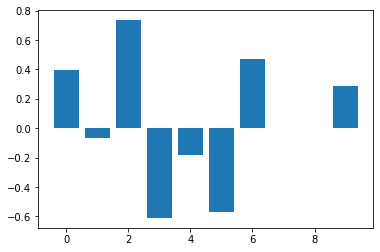

In [32]:
# Feature Importance plots

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [33]:
# predictions for the validation data

predictions_lr = lr.predict(valX)

### Evaluating the Model
- MAE : Mean Average Error
- MSE : Mean Squared Error, quite similar to MAE but noise is exaggerated and larger errors are “punished”.
- RMSE : Root mean squared error, 


In [34]:

# Mean Absolute Error
print("Mean Absolute Error : ", metrics.mean_absolute_error(predictions_lr,valy))

# Mean Squared Error
print("Mean Squared Error : ", metrics.mean_squared_error(predictions_lr,valy))

# Root mean squared Error
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(predictions_lr,valy) ))

Mean Absolute Error :  0.1930447125621008
Mean Squared Error :  0.1930447125621008
Root Mean Squared Error :  0.4393685384299845


### Comparing the score for Train, Val , Test dataset

In [35]:
print("Logistic Regression score for training Data : %f"%lr.score(trainX,trainy))
print("Logistic Regression score for training Data : %f"%lr.score(valX,valy))
print("Logistic Regression score for testing Data : %f"%lr.score(testX,testy))

Logistic Regression score for training Data : 0.802840
Logistic Regression score for training Data : 0.806955
Logistic Regression score for testing Data : 0.787793


> There is not much different in the train, val and test dataset, Hence our model does not overfit or underfit

In [36]:
# checking for accuracy, precision, recall

print("Accuracy of LR model ",metrics.accuracy_score(predictions_lr, valy))
print("Precision Score " , metrics.precision_score(predictions_lr, valy))
print("Recall Score  ", metrics.recall_score(predictions_lr, valy))

Accuracy of LR model  0.8069552874378992
Precision Score  0.5414364640883977
Recall Score   0.6490066225165563


### Confusion Matrix & Classification report
The confusion matrix is a handy presentation of the accuracy of a model with two or more classes. The classification report displays the precision, recall, F1, and support scores for the model.
- Precision — What percent of your predictions were correct?
- Recall — What percent of the positive cases did you catch?
- F1 score — What percent of positive predictions were correct?

In [37]:
print(confusion_matrix(valy,predictions_lr))  

[[941 106]
 [166 196]]


> We can see the majority predicitons lie on the diagonal line of the matrix, which are the correct predicitons!!

In [38]:
## Classification Report
predictions_lr = lr.predict(testX)
print(classification_report(testy,predictions_lr))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1027
           1       0.65      0.48      0.55       382

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



> we got around 81% accuracy!! we are not very good with the "1", maybe we need our model paramteres tuned


## Optimizing the Model
### Lasso and Ridge : L1 and L2 Regularization
Shrinking the coefficients in the regression to avoid overfitting.

In [39]:
optimized_lr_model = LogisticRegression(penalty="l1", solver="liblinear").fit(trainX,trainy)
optimized_lr_model.score(valX,valy)

0.808374733853797

> There is no significant improvement in the model.

#### using GridSearchCV to select the best parameters

In [40]:
optimized_lr_model = LogisticRegression(penalty="l1", solver="liblinear")
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} ## setting the range of parameters
skf = StratifiedKFold(n_splits=5)  ## splits in the data
grids = GridSearchCV(optimized_lr_model,grid,cv=skf)  


grids.fit(valX,valy)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
# Best parameters from the Grid Search
grids.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Testing the model with Test Dataset

In [42]:
predictions_olr = grids.best_estimator_.predict(testX)
print(classification_report(predictions_olr,testy))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1114
           1       0.47      0.61      0.53       295

    accuracy                           0.78      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.80      0.78      0.79      1409



# Results of Logistic Regression
There is not much difference when we use initial ``LogisticRegression`` and  ``Lasso  with GridSearchCV for Logistic Regression``.\
- `Is adjusting hyperparameters and KFold worth it?` \
 There is no significatant improvement to our original model. 
- There is not much increase/drop in the predictions on the Train, Validation, Test Dataset, thus we can conclude the model ``does not overfit the data``.
- Regularization does not help here as the results are almost the same

#AUC ROC Curve
AUC represents the models ability to discriminate between positives and negative classes. 
> An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.
ROC curve is a plot of the true positive rate and false positive rate for given set of pribability predictions at different thresholds.


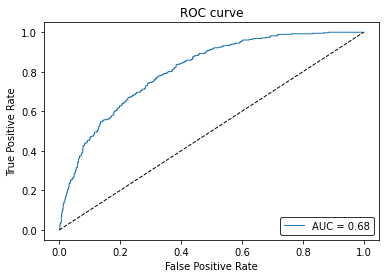

In [43]:
fpr, tpr, thresholds = roc_curve(testy, grids.best_estimator_.predict_proba(testX)[:,1])

preds = grids.best_estimator_.predict(testX)
roc_auc = roc_auc_score(testy, preds)

plt.plot(fpr, tpr, lw=1, label='AUC = %0.2f'%(roc_auc))
plt.plot([0, 1], [0, 1], '--k', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right", frameon = True).get_frame().set_edgecolor('black')

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0. Our model has a decent AUC Score

In [44]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(testy, preds)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc

0.6814095341996462

We have a decent auc score. 

# Random Forest classifier
It is an ensemble tree-based learning algorithm. The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.
## Assumptions
The only assumption that it relies is that sampling is representative. But this is usually a common assumption.

In [45]:
# Random Forest classifier Model
rmc = RandomForestClassifier()

# training the model on train Dataset
model_rmc = rmc.fit(trainX, trainy)

# predictions on the Validation dataset
rmc_pred = model_rmc.predict(valX)

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
# classification report for Random forest model

print(classification_report(valy,rmc_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1047
           1       0.64      0.49      0.56       362

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



> we have 77% accuracy on the validation dataset

### Tuning the Random Forest Classifier Model
The main Hyperparameters of Random forest classifier are:
- ``n_estimators`` : which specifies the number of trees in the forest.
- ``max_depth`` : specifies max depth of each tree
- ``Min_samples_split`` : minimum number of samples required to split an internal leaf node
- ``Min_samples_leaf`` :  The minimum number of samples required to be at a leaf node


In [47]:
# Calibrated classifier

rforest = RandomForestClassifier()

param_grid = {"n_estimators":[100,300,500],"max_depth":[5,20,40],"min_samples_split":[2,5,10,15],"min_samples_leaf":[1,2,5,10]}
rf_gridsearch = GridSearchCV(rforest, param_grid, cv=3, verbose=1,n_jobs=-1)

# rf_gridsearch.fit(trainX,trainy)


In [48]:
rf_gridsearch.fit(trainX,trainy)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [49]:
# best parameters

rf_gridsearch.best_params_

{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 100}

In [50]:
predict_rf = rf_gridsearch.best_estimator_.predict(valX)
print(classification_report(valy, predict_rf))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1047
           1       0.68      0.46      0.55       362

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [51]:
# test dataset
#plotting the confusion matrix
predict_rf_test = rf_gridsearch.best_estimator_.predict(testX)
print("Classification Report :")
print(classification_report(testy, predict_rf_test))

print("Confusion Matrix:")
print(confusion_matrix(testy,predict_rf_test))

Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1027
           1       0.67      0.42      0.52       382

    accuracy                           0.79      1409
   macro avg       0.74      0.67      0.69      1409
weighted avg       0.77      0.79      0.77      1409

Confusion Matrix:
[[948  79]
 [222 160]]


> Most values lie on the diagonal line, which means we are good with the predicitons.\
> We also have an accuracy of 80% which is good

## Result for Random Forest Classifier
- The predicitons are improved with Hyperparameter tuning. We get pretty good accuracy of 80% on validation & test dataset.

# Support Vector Machine
SVM algorithm aims to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. The objective here is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. \
## Model assumptions:
The margin should be as large as possible.
The support vectors are the most useful data points because they are the ones most likely to be incorrectly classified.

In [52]:
model = SVC() 
svc_model = model.fit(trainX, trainy)  # training the model
  
# printing prediction result
svc_predictions = svc_model.predict(valX)  # predicting on the validation dataset

# Printing the classification report
print(classification_report(valy, svc_predictions)) 

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.78      0.97      0.86      1047
           1       0.68      0.21      0.32       362

    accuracy                           0.77      1409
   macro avg       0.73      0.59      0.59      1409
weighted avg       0.76      0.77      0.72      1409



In [53]:
# checking the score for the model

print("SVM score for Validation Data : %f"%accuracy_score(valy,svc_predictions))

SVM score for Validation Data : 0.772179


# Hyper parameter Tuning for SVM
The 2 most important parameters in SVM are ``gamma`` and ``c``.  We need to find the best hyper parameters to find the balance between bias and variance and prevent the model from overfitting and underfitting

In [54]:
## GridsearchCV

gsc = GridSearchCV( estimator= SVC(), param_grid={'C': [ 1, 100, 1000],
                                                  'gamma': [ 0.005, 1, 3, 5], "kernel":["rbf","sigmoid"]},cv=5, refit= True, verbose=2)
gsc.fit(trainX,trainy)
print("Best Parameters for SVM Model: ", gsc.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1, gamma=0.005, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, gamma=0.005, kernel=rbf, total=   1.2s
[CV] C=1, gamma=0.005, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ..................... C=1, gamma=0.005, kernel=rbf, total=   1.3s
[CV] C=1, gamma=0.005, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.005, kernel=rbf, total=   1.3s
[CV] C=1, gamma=0.005, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.005, kernel=rbf, total=   1.2s
[CV] C=1, gamma=0.005, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.005, kernel=rbf, total=   1.2s
[CV] C=1, gamma=0.005, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.005, kernel=sigmoid, total=   0.3s
[CV] C=1, gamma=0.005, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.005, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.005, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.005, kernel=sigmoid, total=   0.2s
[CV] C=1, gamma=0.005, kernel=sigmoid ................................
[CV] .

[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.2s
[CV] C=100, gamma=3, kernel=rbf ......................................
[CV] ....................... C=100, gamma=3, kernel=rbf, total=   1.6s
[CV] C=100, gamma=3, kernel=rbf ......................................
[CV] ....................... C=100, gamma=3, kernel=rbf, total=   2.2s
[CV] C=100, gamma=3, kernel=rbf ......................................
[CV] ....................... C=100, gamma=3, kernel=rbf, total=   2.0s
[CV] C=100, gamma=3, kernel=rbf ......................................
[CV] ....................... C=100, gamma=3, kernel=rbf, total=   2.3s
[CV] C=100, gamma=3, kernel=rbf ......................................
[CV] ....................... C=100, gamma=3, kernel=rbf, total=   1.6s
[CV] C=100, gamma=3, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=3, kernel=sigmoid, total=   0.2s
[CV] C=100, gamma=3, kernel=sigmoid ..................................
[CV] .

[CV] .................. C=1000, gamma=5, kernel=sigmoid, total=   0.2s
[CV] C=1000, gamma=5, kernel=sigmoid .................................
[CV] .................. C=1000, gamma=5, kernel=sigmoid, total=   0.2s
[CV] C=1000, gamma=5, kernel=sigmoid .................................
[CV] .................. C=1000, gamma=5, kernel=sigmoid, total=   0.2s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.6min finished


Best Parameters for SVM Model:  {'C': 1, 'gamma': 0.005, 'kernel': 'rbf'}


In [55]:
gsc.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
# predicitons for val data

svc_pred = gsc.best_estimator_.predict(valX)

In [57]:
print("Accuracy of SVM model ",metrics.accuracy_score(svc_pred, valy))
print("Precision Score " , metrics.precision_score(svc_pred, valy))
print("Recall Score  ", metrics.recall_score(svc_pred, valy))

Accuracy of SVM model  0.7693399574166075
Precision Score  0.39226519337016574
Recall Score   0.5748987854251012


Confusion matrix for test dataset

In [58]:
# test dataset
svc_pred_test = gsc.best_estimator_.predict(testX)
print(metrics.accuracy_score(svc_pred_test, testy))
confusion_matrix(testy,svc_pred_test)

0.7459190915542938


array([[923, 104],
       [254, 128]], dtype=int64)

### Conclusion for SVM 
We did not improve this model much. The accuracy fo the model is almost the same compared to our original model. Hence there is no significant improvement.


## Conclusion:


- Hyperparameter tuning can be advantageous in creating a better classification model. In the cases above, it seems that it might not have been necessary as the basic model themselves were pretty good with classification.  Using ``gridsearchcv`` to choose hyperparameters can sometimes be very time consuming.
- Random Forest Classifier and Logistic regression Models turn out to be the best Predictive models for this dataset, with an accuracy of around 80%
- The models do not overfit or underfit the data
- ``Most significant columns are`` : 'SeniorCitizen', 'tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'PaperlessBilling','MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes'


## Link of Resources used for citing
- https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
- https://github.com/IBM/telco-customer-churn-on-icp4d/blob/master/examples/Telco-customer-churn-ICP4D-with-output.ipynb
-https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
- https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167

